# Decision tree and Random Forest

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
train_data = pd.read_csv("adult.data", sep=",")

test_data = pd.read_csv("adult.test", sep=",")

From https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.


## Attribute Information:

date time year-month-day hour:minute:second

Temperature, in Celsius

Relative Humidity, %

Light, in Lux

CO2, in ppm

Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air

Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status



In [19]:
train_data.sample(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,pay
1247,49,Private,148995,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
25877,70,?,133248,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,<=50K
8403,41,Private,184846,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
4031,36,Private,183612,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,40,United-States,>50K
27729,34,Private,127610,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,15,United-States,<=50K
28894,25,Private,198587,Some-college,10,Never-married,Tech-support,Not-in-family,Black,Female,2174,0,50,United-States,<=50K
26237,52,Private,273514,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
5207,53,?,220640,Bachelors,13,Divorced,?,Other-relative,Other,Female,0,0,20,United-States,<=50K
3832,24,Private,123983,11th,7,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,40,Vietnam,<=50K
6714,61,Private,176839,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States,>50K


In [4]:
print(train_data.shape)

(32561, 15)


In [5]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

criterion='gini'

max_depth=None


min_samples_leafint or float, default=1



## Decision Tree with Entropy criterion

In [20]:
tree = DecisionTreeClassifier(max_depth=9, criterion='entropy', random_state=42)

temp_mass = np.array([0 if x == 'Male' else 1 for x in train_data['sex'].values])
train_data['sex'] = temp_mass
#White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
temp_mass = np.array([0 if x == 'Other' else 1 if x == 'Asian-Pac-Islander' else 2 if x == 'Black' else 3 if x == 'Amer-Indian-Eskimo' else 3 if x == 'White' else 0 for x in train_data['race'].values])
train_data['race'] = temp_mass

exp1_data_train = train_data[['age','hours-per-week','education-num','race','sex']]

temp_mass = np.array([0 if x == '<=50K' else 1 for x in train_data['pay'].values])
train_data['pay'] = temp_mass

exp1_data_labels = train_data['pay']
tree.fit(exp1_data_train, exp1_data_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

temp_mass = np.array([0 if x == 'Male' else 1 for x in test_data['sex'].values])
test_data['sex'] = temp_mass
#White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
temp_mass = np.array([0 if x == 'Other' else 1 if x == 'Asian-Pac-Islander' else 2 if x == 'Black' else 3 if x == 'Amer-Indian-Eskimo' else 3 if x == 'White' else 0 for x in test_data['race'].values])
test_data['race'] = temp_mass

exp1_data_test = test_data[['age','hours-per-week','education-num','race','sex']]

temp_mass = np.array([0 if x == '<=50K' else 1 for x in test_data['pay'].values])
test_data['pay'] = temp_mass
exp1_data_tlabels = test_data['pay']

prediction = tree.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

0.16491615994103556
0.28313824739006643


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [22]:
tree.classes_

array([0, 1])

In [23]:
tree.feature_importances_

array([0.42629271, 0.11104586, 0.32953124, 0.01383861, 0.11929158])

In [24]:
tree.max_features_

5

In [25]:
tree.n_classes_

2

In [26]:
tree.n_features_in_

5

In [27]:
tree.n_outputs_

1

## Decision Tree with Gini criterion

In [28]:
new_tree = DecisionTreeClassifier(max_depth=9, criterion='gini', random_state=42)
#exp1_data_train = train_data[['Temperature','Humidity']]
#exp1_data_labels = train_data['Occupancy']

#temp_mass = np.array([0 if x == 'Male' else 1 for x in train_data['sex'].values])
#train_data['sex'] = temp_mass
#White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
#temp_mass = np.array([0 if x == 'Other' else 1 if x == 'Asian-Pac-Islander' else 2 if x == 'Black' else 3 if x == 'Amer-Indian-Eskimo' else 3 if x == 'White' else 0 for x in train_data['race'].values])
#train_data['race'] = temp_mass

exp1_data_train = train_data[['age','hours-per-week','education-num','race','sex']]

#temp_mass = np.array([0 if x == '<=50K' else 1 for x in train_data['pay'].values])
#train_data['pay'] = temp_mass

exp1_data_labels = train_data['pay']

new_tree.fit(exp1_data_train, exp1_data_labels)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [29]:
exp2_data_test = test_data[['age','hours-per-week','education-num','race','sex']]
exp2_data_tlabels = test_data['pay']

prediction = new_tree.predict(exp2_data_test)

print(accuracy_score(exp2_data_tlabels, prediction))
print(f1_score(exp2_data_tlabels, prediction))
print(roc_auc_score(exp2_data_tlabels, prediction))

0.14919231005466493
0.2596472474612507


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

# Full data training

In [21]:
one_more_tree = DecisionTreeClassifier(max_depth=3)
one_more_tree.fit(train_data.drop(['Occupancy'], axis=1), train_data['Occupancy'])

exp3_data_test = test_data.drop(['Occupancy'], axis=1)
exp3_data_tlabels = test_data['Occupancy']

prediction = one_more_tree.predict(exp3_data_test)

print(accuracy_score(exp3_data_tlabels, prediction))
print(f1_score(exp3_data_tlabels, prediction))
print(roc_auc_score(exp3_data_tlabels, prediction))


0.9782363977485928
0.9708835341365462
0.9817752960021779


In [22]:
one_more_tree.feature_importances_

array([0.00596696, 0.        , 0.98612782, 0.00790521, 0.        ])

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

From https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]



n_estimators int, default=100
The number of trees in the forest

criterion='gini'

max_depth=None

bootstrap=True

n_jobs=None

<ipython-input-24-ba7f3c76c3bb>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


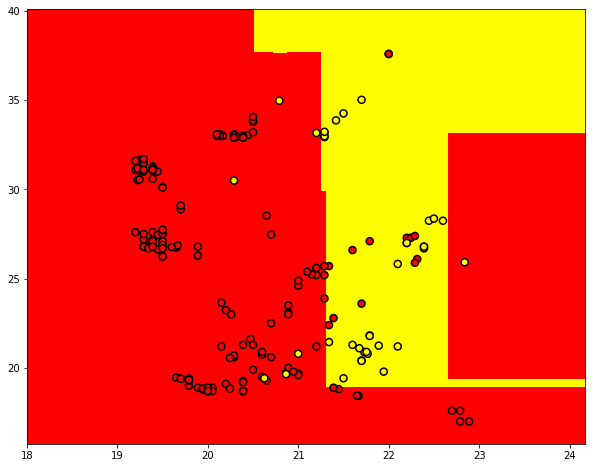

In [24]:
rf = RandomForestClassifier(n_estimators=5, max_depth=3, criterion='entropy', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
rf.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

In [25]:
exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

0.6679174484052532
0.3934201507882111
0.5885669994336398


### Entropy

0.851782363977486
0.7875201721355569
0.8307664821742395


<ipython-input-27-1f5d08225fb1>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


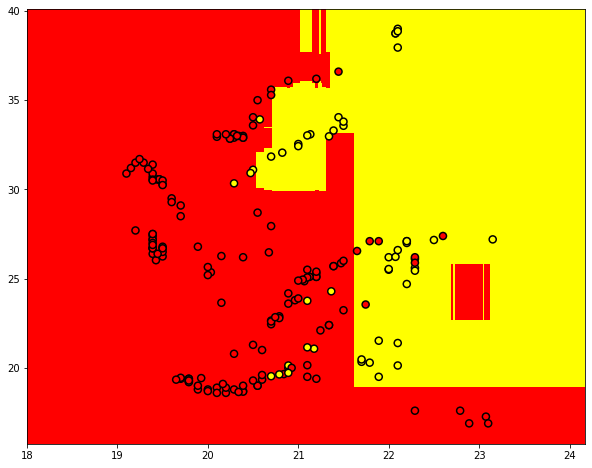

In [27]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
rf.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

### Gini

0.8345215759849907
0.7567567567567568
0.8071039307339104


<ipython-input-28-3620e92b75ac>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


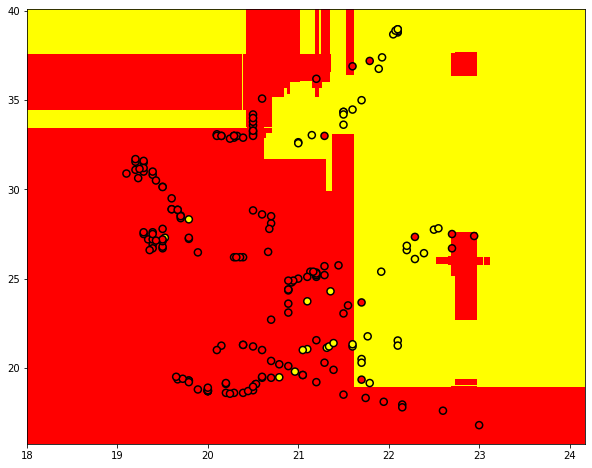

In [28]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='gini', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
rf.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

0.7763602251407129
0.6405307599517491
0.7273714204458446


<ipython-input-29-4fc9ff63da41>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


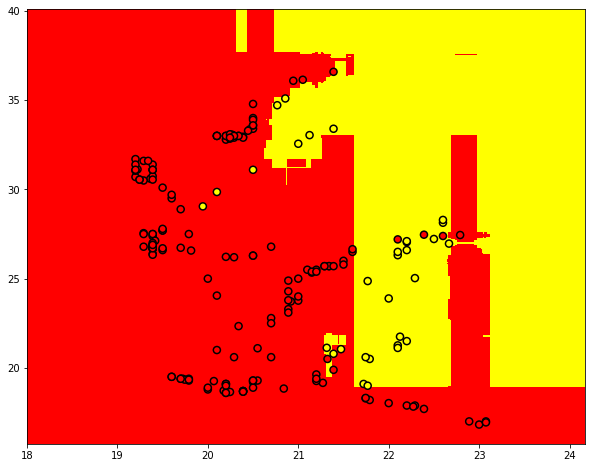

In [29]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
rf.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

In [32]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', random_state=42)
exp1_data_train = train_data.drop(['Occupancy'], axis=1)
exp1_data_labels = train_data['Occupancy']

exp1_data_test = test_data.drop(['Occupancy'], axis=1)
rf.fit(exp1_data_train, exp1_data_labels)


prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))


0.9606003752345216
0.9459598558929492
0.9573792717045982


# OOB score

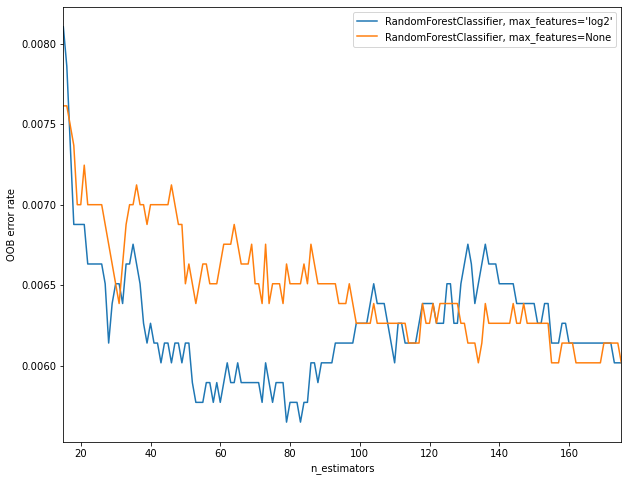

In [30]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

from collections import OrderedDict
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')


exp_data_train = train_data.drop(['Occupancy'], axis=1)
exp_data_tlabels = train_data['Occupancy']


ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, random_state=42)) ]


error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(exp_data_train, exp_data_tlabels)

        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# HomeWork

In [73]:
import numpy as np

class SomeClass(object):
    
    def __init__(self, item2, depth, criterion):
        self.item = 5
        self.item2 = item2
        self.coeff = np.zeros(depth)
        self.criterion = criterion

    def fit(self, X, y):
        # select indx of feature
        # find best coeff for featues splitting from X_indx according to the criterion
        return np.sum(y)

    def predict(self, X):
        X_predicted = X
        return X_predicted

In [ ]:
myclass = SomeClass(10)
print(myclass.item)
print(myclass.item2)